In [1]:

import gym
import numpy as np
import matplotlib.pyplot as plt
import math
from c_worm import *
from celegan_env import WormSimulationEnv
from trained_connectome import all_neuron_names
from Genetic_running import GeneticRUN
# Genetic Algorithm parameters
from Genetic_Dynamic_TRAINING import * 
#from graphing import graph, graph_dif
from weight_dict import dict


2024-07-03 10:37:26,583	INFO util.py:125 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


/home/miles2/anaconda3/lib/python3.7/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
2024-07-03 10:37:27,632	INFO worker.py:1458 -- Connecting to existing Ray cluster at address: 172.22.1.202:6379...
2024-07-03 10:37:27,647	INFO worker.py:1642 -- Connected to Ray cluster.


Generation 1 - Best Fitness: 31.0
Generation 2 - Best Fitness: 31.0
Generation 3 - Best Fitness: 32.5
Generation 4 - Best Fitness: 32.5
Generation 5 - Best Fitness: 32.5
Generation 6 - Best Fitness: 32.5
Generation 7 - Best Fitness: 32.5
Generation 8 - Best Fitness: 32.5
Generation 9 - Best Fitness: 32.5
Generation 10 - Best Fitness: 32.5
Generation 11 - Best Fitness: 32.5
Generation 12 - Best Fitness: 32.5
Generation 13 - Best Fitness: 32.5
Generation 14 - Best Fitness: 32.5
Generation 15 - Best Fitness: 68.5
Generation 16 - Best Fitness: 68.5
Generation 17 - Best Fitness: 68.5
Generation 18 - Best Fitness: 68.5
Generation 19 - Best Fitness: 68.5
Generation 20 - Best Fitness: 68.5
Generation 21 - Best Fitness: 68.5
Generation 22 - Best Fitness: 68.5
Generation 23 - Best Fitness: 68.5
Generation 24 - Best Fitness: 68.5
Generation 25 - Best Fitness: 68.5
Generation 26 - Best Fitness: 68.5
Generation 27 - Best Fitness: 68.5
Generation 28 - Best Fitness: 68.5
Generation 29 - Best Fitness:

KeyboardInterrupt: 

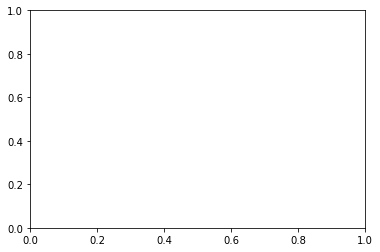

In [2]:
population_size = 16
generations = 200
mutation_rate = 0.6
training_interval = 200  # Train the agent every 25 steps
total_episodes = 1  # Number of episodes per evaluation
train_params =3689 #number of connections
##que te vaya bien
env = WormSimulationEnv(num_worms=population_size)
# Initialize and run the Genetic Algorithm
ga = Genetic_Dyn_Algorithm(population_size, train_params, mutation_rate, total_episodes, training_interval)
best_weight_matrix = ga.run(env, generations)
print("Best weight matrix found:", best_weight_matrix)
values_list = []

for sub_dict in dict.values():
    # Extend the values list with the values from each sub-dictionary
    values_list.extend(sub_dict.values())

In [ ]:
def write_array_to_file(array, filename):
    """Write an array to a text file, with each element on a new line."""
    try:
        with open(filename, 'w') as file:
            for item in array:
                file.write(f"{item}\n")
        print(f"Array successfully written to {filename}")
    except Exception as e:
        print(f"An error occurred while writing to the file: {e}")
    
write_array_to_file(best_weight_matrix,"array.txt")

In [ ]:
def graph_dif(weights1, weights2, connections_dict):
    """
    Compare two sets of weights and plot the differences in average weight sums.

    Parameters:
    - weights1: A 1D array of weights for the first set.
    - weights2: A 1D array of weights for the second set.
    - connections_dict: A dictionary where keys are pre-neurons and values are lists of post-neurons.
    - neuron_labels: List of all neuron names.
    """
    
    def calculate_tot_and_weight_sums(weights, connections_dict):
            
        # Create a list of neuron labels from connections_dict
        neuron_labels = list(all_neuron_names)

        # Calculate the size of the square weight matrix
        matrix_size = len(neuron_labels)
        
        # Reshape combined_weights into a square matrix
        square_weight_matrix = np.zeros((len(connections_dict.keys()), matrix_size))
        index = 0
        for i, pre_neuron in enumerate(connections_dict.keys()):
            connections = connections_dict[pre_neuron]
            for j, post_neuron in enumerate(neuron_labels):
                if post_neuron in connections:
                    square_weight_matrix[i, j] = weights[index]
                    index += 1
        
        # Create a DataFrame from the square_weight_matrix and neuron_labels
        weight_matrix_df = pd.DataFrame(square_weight_matrix, index=list(connections_dict.keys()), columns=neuron_labels)
        
        # Sort neurons by the sum of weights
        row_weights = weight_matrix_df.sum(axis=1)
        sorted_row_indices = np.argsort(row_weights)[::-1]
        sorted_matrix_df = weight_matrix_df.iloc[sorted_row_indices]
            
        max_weight = np.max(np.abs(sorted_matrix_df.values))
        vmin = -max_weight
        vmax = max_weight
        

        
        # Plotting average weight sum divided by connections
        tot = 0
        for post_neuron in all_neuron_names:
            pre_neurons = [pre_neuron for pre_neuron, post_neurs in connections_dict.items() if post_neuron in post_neurs]
            if pre_neurons:
                indices = [all_neuron_names.index(pre_neuron) for pre_neuron in pre_neurons]
                weights_i = weights[indices]
                n = len(pre_neurons)
                tot += (np.abs(np.sum(np.abs(weights_i)) * n))
        
        post_neurons = []
        avg_weight_sums = []
        for post_neuron in all_neuron_names:
            pre_neurons = [pre_neuron for pre_neuron, post_neurs in connections_dict.items() if post_neuron in post_neurs]
            if pre_neurons:
                indices = [all_neuron_names.index(pre_neuron) for pre_neuron in pre_neurons]
                weights_i = weights[indices]
                n = len(pre_neurons)
                weight_product = np.sum(np.abs(weights_i)) * n
                post_neurons.append(post_neuron)
                avg_weight_sums.append((weight_product / tot))
        

        
        # Plotting average weight sum divided by connections
        tot = 0
        for post_neuron in all_neuron_names:
            pre_neurons = [pre_neuron for pre_neuron, post_neurs in connections_dict.items() if post_neuron in post_neurs]
            if pre_neurons:
                indices = [all_neuron_names.index(pre_neuron) for pre_neuron in pre_neurons]
                weights_i = weights[indices]
                n = len(pre_neurons)
                tot += (np.abs(np.sum(np.abs(weights)) / n))
        
        post_neurons = []
        avg_weight_quotient = []
        for post_neuron in all_neuron_names:
            pre_neurons = [pre_neuron for pre_neuron, post_neurs in connections_dict.items() if post_neuron in post_neurs]
            if pre_neurons:
                indices = [all_neuron_names.index(pre_neuron) for pre_neuron in pre_neurons]
                weights_i = weights[indices]
                n = len(pre_neurons)
                weight_product = np.sum(np.abs(weights_i)) / n
                post_neurons.append(post_neuron)
                avg_weight_quotient.append((weight_product / tot))
        return post_neurons, avg_weight_sums , sorted_matrix_df, avg_weight_quotient
    
    # Calculate average weight sums and totals for both sets of weights
    post_neurons1, avg_weight_sums1,sorted_matrix_df1,avg_weight_quotient1 = calculate_tot_and_weight_sums(weights1, connections_dict)
    post_neurons2, avg_weight_sums2,sorted_matrix_df2,avg_weight_quotient2 = calculate_tot_and_weight_sums(weights2, connections_dict)
    #print(avg_weight_sums1)
    #print(avg_weight_sums2)
    # Compute differences in average weight sums
    avg_weight_sums_diff =  np.array(avg_weight_sums1)-np.array(avg_weight_sums2) 
    avg_weight_quotient_dif = np.array(avg_weight_quotient1)-np.array(avg_weight_quotient2) 
    sorted_matrix_dif = np.array(np.abs(sorted_matrix_df1))-np.array(np.abs(sorted_matrix_df2))
    
    # Plotting
    plt.figure(figsize=(18, 12))
    #print(avg_weight_sums_diff)
    # Bar plot for average weight sum differences
    plt.subplot(2, 3, 1)
    plt.bar(post_neurons1, avg_weight_sums_diff, color='skyblue')
    plt.xlabel('Post Neurons')
    plt.ylabel('Difference ')
    plt.title('Difference in Normalized Total Connection Importance') #Weights * Connections)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

            # Subplot for average weight sum divided by connections
    plt.subplot(2, 3, 2)
    plt.bar(post_neurons1, avg_weight_quotient_dif, color='skyblue')
    plt.xlabel('Post Neurons')
    plt.ylabel('Normalized Weight Product')
    plt.title('Difference in Normalized Average Connection Importance') ##weights/connections
    plt.xticks(rotation=90)
            # Plotting weight matrix
      # Adjust figure size as needed
    max_weight = np.max(np.abs(sorted_matrix_dif))
    vmin = -max_weight
    vmax = max_weight
        # Subplot for weight matrix
    plt.subplot(2, 3, 3)
    c = plt.pcolormesh(sorted_matrix_dif, cmap='twilight', vmin=vmin, vmax=vmax)
    plt.title('Weight Matrix')
    plt.xlabel('Post Neurons')
    plt.ylabel('Pre Neurons')
    plt.gca().invert_yaxis()
    plt.colorbar(c, label='Weight')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [ ]:


graph(best_weight_matrix,dict)
graph(np.array(values_list),dict)
#graph_dif(best_weight_matrix,np.array(values_list),dict)
#graph_weight_sum_divided_by_connections(best_weight_matrix, dict)
# Run the simulation with the best weight matrix
GeneticRUN(best_weight_matrix, total_episodes, training_interval).run(env)

env.close()